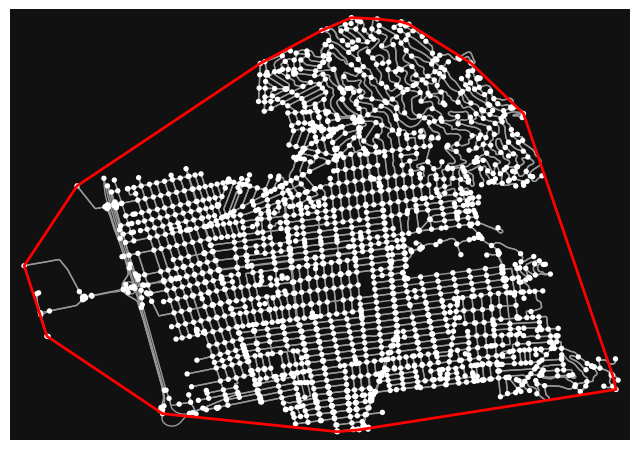

In [ ]:
import geopandas as gpd
import matplotlib.pyplot as plt
import networkx as nx
import osmnx as ox
from shapely.geometry import MultiPoint, Point


In [ ]:

# 1. Download street network
place = "Berkeley, California, USA"
G = ox.graph_from_place(place, network_type="drive")

# 2. Add travel time (in seconds) to each edge
G = ox.add_edge_speeds(G)  # adds 'speed_kph'
G = ox.add_edge_travel_times(G)  # adds 'travel_time'

# 3. Choose center point and find nearest node
center_point = (37.8715, -122.2730)  # lat, lon
center_node = ox.distance.nearest_nodes(G, center_point[1], center_point[0])

# 4. Get nodes reachable within 30 minutes (1800 seconds)
travel_time_limit = 1800  # seconds
subgraph = nx.ego_graph(G, center_node, radius=travel_time_limit, distance='travel_time')

# 5. Get boundary of the reachable area
nodes = [Point((data["x"], data["y"])) for node, data in subgraph.nodes(data=True)]
mp = MultiPoint(nodes)
boundary = mp.convex_hull  # or use alpha shape for concave hull (see below)

# 6. Plot
fig, ax = ox.plot_graph(G, show=False, close=False)
gpd.GeoSeries(boundary).plot(ax=ax, facecolor='none', edgecolor='red', linewidth=2)
plt.show()
